<a href="https://colab.research.google.com/github/lingabalaji17/ECG-Classification/blob/main/ECG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os

In [3]:
import pandas as pd
import numpy as np
import os
import wfdb
import ast

import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0



In [4]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# Define the path to the directory where you want to download the data
download_dir = '/content/drive/MyDrive/'
# Change to the download directory
os.chdir(download_dir)

In [6]:
# Download the data (replace <file_id> with the actual file ID)
#file_id = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3.zip'
#!gdown --id $file_id

In [7]:
!unzip 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3.zip'

Streaming output truncated to the last 5000 lines.
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19338_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19339_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19339_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19340_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19340_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19341_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19341_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/19000/19342_hr.dat  
  inflating: ptb-xl-a-large-publicly-availabl

In [8]:
!pip install biosppy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 4.1 MB/s eta 0:00:00


In [9]:
data_path = '/content/drive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'

ptbxl_df = pd.read_csv(os.path.join(data_path,'ptbxl_database.csv'))
scp_statements_df = pd.read_csv(os.path.join(data_path,'scp_statements.csv'))

In [10]:
ptbxl_df.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [11]:
ptbxl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

In [12]:
scp_statements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     71 non-null     object 
 1   description                    71 non-null     object 
 2   diagnostic                     44 non-null     float64
 3   form                           19 non-null     float64
 4   rhythm                         12 non-null     float64
 5   diagnostic_class               44 non-null     object 
 6   diagnostic_subclass            44 non-null     object 
 7   Statement Category             71 non-null     object 
 8   SCP-ECG Statement Description  71 non-null     object 
 9   AHA code                       37 non-null     float64
 10  aECG REFID                     23 non-null     object 
 11  CDISC Code                     13 non-null     object 
 12  DICOM Code                     13 non-null     objec

In [13]:
print(ptbxl_df.isna().sum())

ecg_id                              0
patient_id                          0
age                                 0
sex                                 0
height                          14825
weight                          12378
nurse                            1473
site                               17
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8468
infarction_stadium1             16187
infarction_stadium2             21696
validated_by                     9378
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20201
static_noise                    18539
burst_noise                     21186
electrodes_problems             21769
extra_beats                     19850
pacemaker                       21508
strat_fold                          0
filename_lr 

In [14]:
print(scp_statements_df.isna().sum())

Unnamed: 0                        0
description                       0
diagnostic                       27
form                             52
rhythm                           59
diagnostic_class                 27
diagnostic_subclass              27
Statement Category                0
SCP-ECG Statement Description     0
AHA code                         34
aECG REFID                       48
CDISC Code                       58
DICOM Code                       58
dtype: int64


In [15]:
scp_statements_df.head()

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [16]:
#data cleaning, remove records whose age >=150
ptbxl_df = ptbxl_df[ptbxl_df['age'] <= 150]

In [17]:
ptbxl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21506 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21506 non-null  int64  
 1   patient_id                    21506 non-null  float64
 2   age                           21506 non-null  float64
 3   sex                           21506 non-null  int64  
 4   height                        6816 non-null   float64
 5   weight                        9267 non-null   float64
 6   nurse                         20060 non-null  float64
 7   site                          21491 non-null  float64
 8   device                        21506 non-null  object 
 9   recording_date                21506 non-null  object 
 10  report                        21506 non-null  object 
 11  scp_codes                     21506 non-null  object 
 12  heart_axis                    13167 non-null  object 
 13  i

### **Mapping SCP Codes - Diagnostic Classes and Diagnostic Sub Classes**

In [18]:
def spc_to_diag(spc_codes, subclass=False):
    ''' 
    Function that returns the diagnostic label of the highest SPC codes as given in the PTB_XL database.
    
    SPC codes are labelled in a dictionary with probabilities of being that label
     ex. {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
    spc_statements.csv provides alookup to convert spc codes to diagnostic label
    
    INPUTS: 
        spc_codes: string of spc_code dictionary as in the spc_codes column of the ptbxl_databse
        subclass: returns superclass if TRUE, subclass if FALSE 
    ''' 
    
    # Convert string to dictionary
    codes = ast.literal_eval(spc_codes)
    
    # Get the maximum value in the dictionary
    max_value = max(codes.values())

    # Find all keys with the maximum value
    keys_with_max_value = [key for key, value in codes.items() if value == max_value]

    # If there is only one key with the maximum value, return it
    if len(keys_with_max_value) == 1:
        max_code = keys_with_max_value[0]
    else:
        return None

    # Convert the maximum spc code to the diganostic class
    if not subclass:
        diagnosis = scp_statements_df[scp_statements_df.iloc[:,0] == max_code]['diagnostic_class'].item()
    else:
        diagnosis = scp_statements_df[scp_statements_df.iloc[:,0] == max_code]['diagnostic_subclass'].item()

    return diagnosis

In [19]:
#As this experiment is Multi-Class Classification, the records that have multiple labels are removed in the above method

superclasses = ptbxl_df['scp_codes'].apply(spc_to_diag)
subclasses = ptbxl_df['scp_codes'].apply(spc_to_diag, subclass=True)

In [20]:
columns = ['strat_fold', 'filename_lr', 'filename_hr']
ecg_dataset = ptbxl_df[columns]
ecg_dataset.insert(0, 'class', superclasses)
ecg_dataset.insert(1, 'subclass', subclasses)

ecg_dataset = ecg_dataset.dropna(axis=0)

ecg_dataset.head()

,class,subclass,strat_fold,filename_lr,filename_hr
0,NORM,NORM,3,records100/00000/00001_lr,records500/00000/00001_hr
1,NORM,NORM,2,records100/00000/00002_lr,records500/00000/00002_hr
2,NORM,NORM,5,records100/00000/00003_lr,records500/00000/00003_hr
3,NORM,NORM,3,records100/00000/00004_lr,records500/00000/00004_hr
4,NORM,NORM,4,records100/00000/00005_lr,records500/00000/00005_hr


In [21]:
ecg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16235 entries, 0 to 21798
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        16235 non-null  object
 1   subclass     16235 non-null  object
 2   strat_fold   16235 non-null  int64 
 3   filename_lr  16235 non-null  object
 4   filename_hr  16235 non-null  object
dtypes: int64(1), object(4)
memory usage: 761.0+ KB


In [22]:
print(f"{superclasses.isna().sum()} of Records removed due to Multi Label from {len(ptbxl_df)}")
print (f"{len(ecg_dataset)} exists upon Data Cleaning")

5271 of Records removed due to Multi Label from 21506
16235 exists upon Data Cleaning


# **Exploratory Data Analysis on ECG dataset**

In [23]:
''' get the ecg signal data from the filename and the path'''
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [24]:
#samling rate of 100 hz
sampling_rate = 100
ecg_data = load_raw_data(ecg_dataset,sampling_rate, data_path+"/")
ecg_data

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [25]:
print (f"Shape of ECG Data is {ecg_data.shape}")

Shape of ECG Data is (16235, 1000, 12)


In [26]:
# Let's Visualize the sample ECG data for different classes.
def plot_sample_ecg(df, sampling_rate, data_path, diagnostic_class):
  if sampling_rate == 100:
    ecg_class = df[df['class'] == diagnostic_class].iloc[0]['filename_lr']
  else:
    ecg_class = df[df['class'] == diagnostic_class].iloc[0]['filename_hr']

  record100 = wfdb.rdrecord(os.path.join(data_path,ecg_class))
  wfdb.plot_wfdb(record=record100, title=f'Sample signal of 100 hz {diagnostic_class} Record', figsize=(15,12))

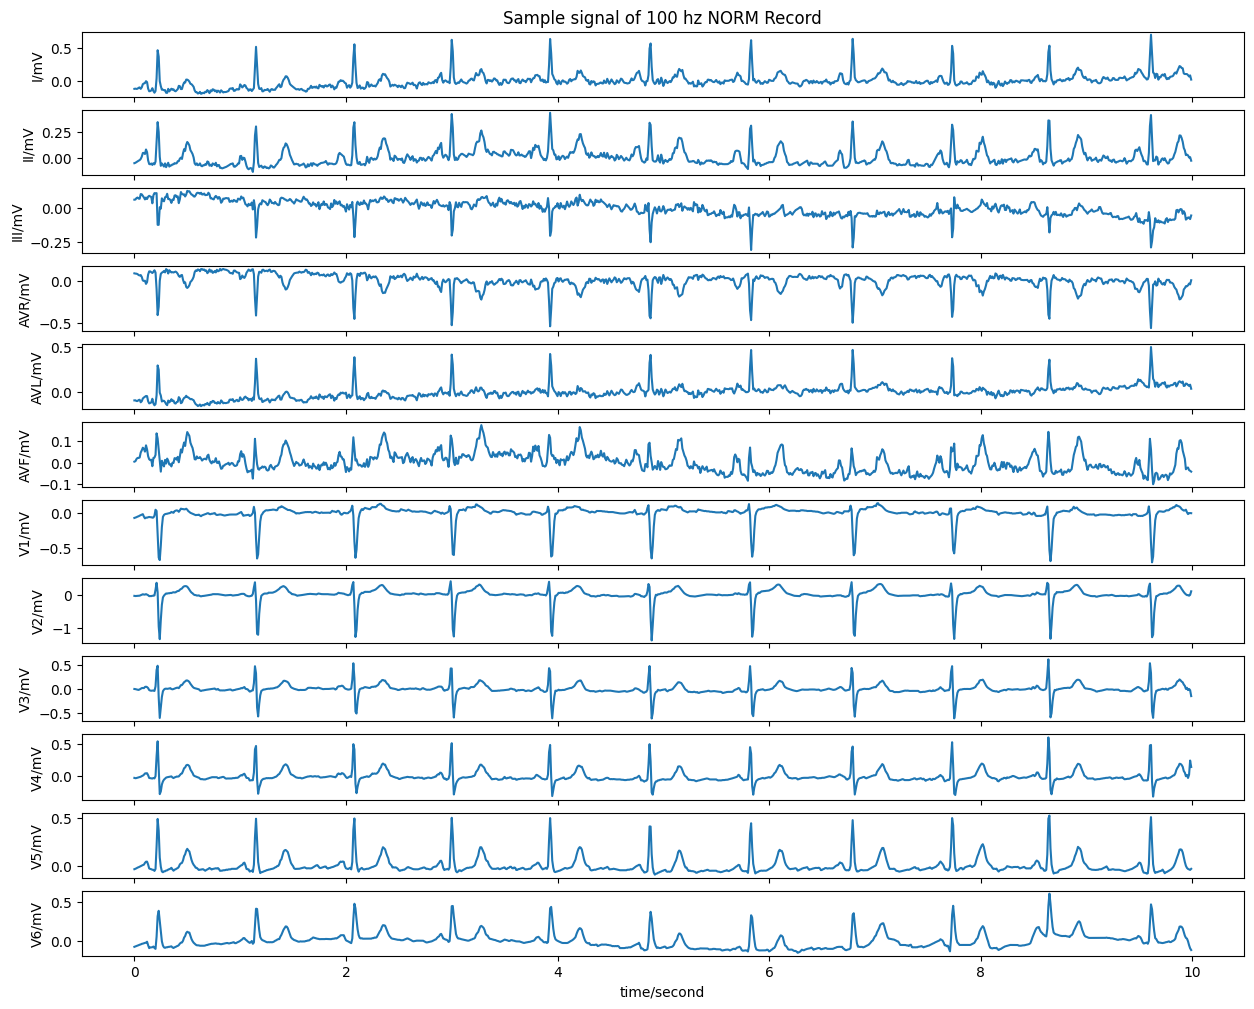

In [27]:
#plot for NORM at sampling rate of 100HZ
plot_sample_ecg(ecg_dataset, 100, data_path, "NORM")

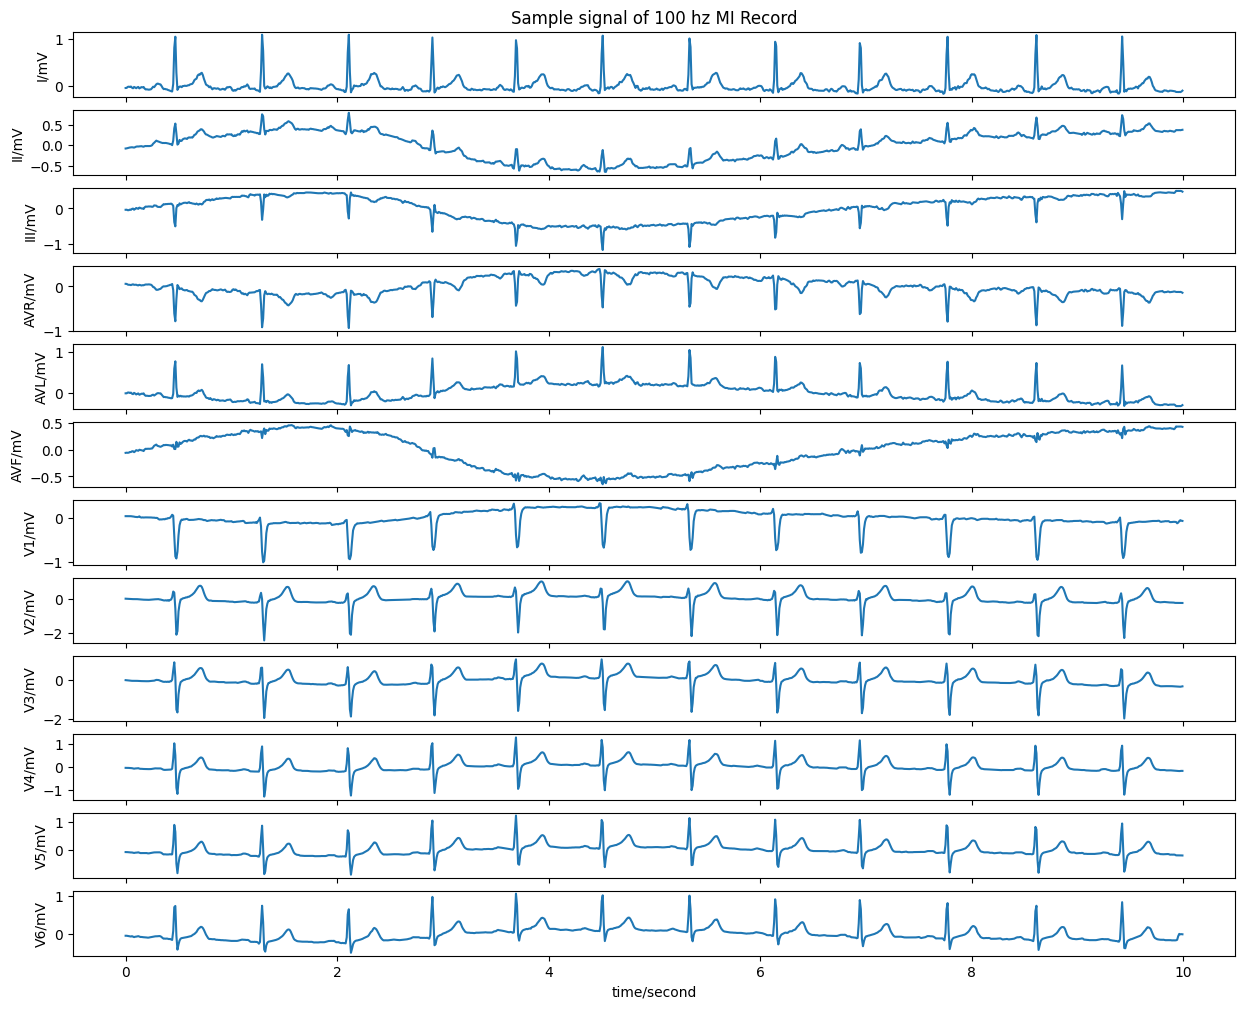

In [28]:
#plot for MI at sampling rate of 100HZ
plot_sample_ecg(ecg_dataset, 100, data_path, "MI")

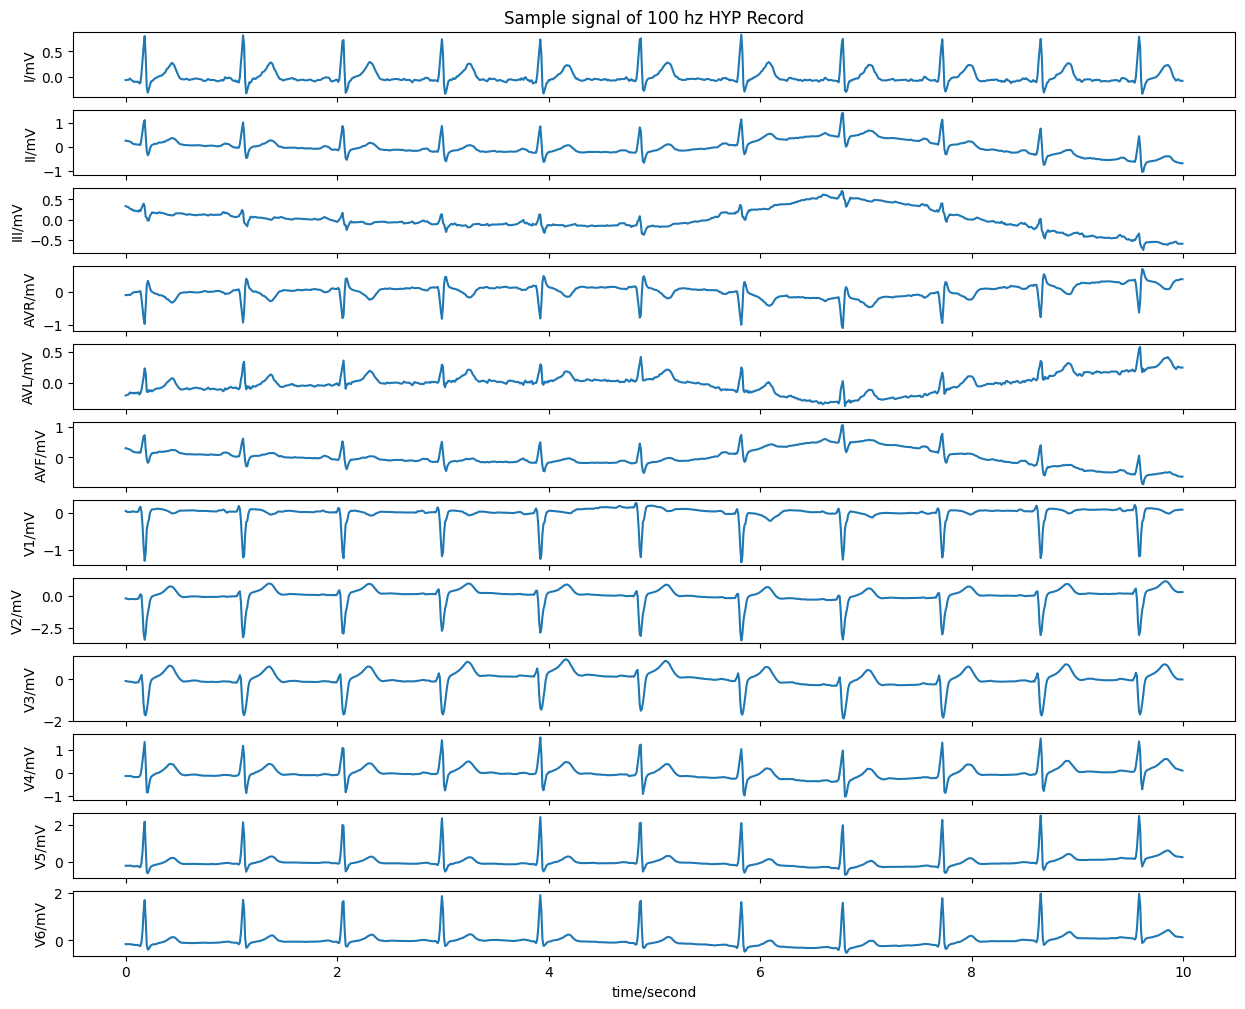

In [29]:
#plot for NORM at sampling rate of 100HZ
plot_sample_ecg(ecg_dataset, 100, data_path, "HYP")

In [30]:
!pip install fasteda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4736 sha256=15de203296c532838afaa166f5395a2926a89d340a5d1f645c906881f9e6ddf7
  Stored in directory: /root/.cache/pip/wheels/93/57/7e/fdc4b9923cf3f1f46de4e2ea7a5a4acb335357f919920ffb7c
Successfully built fasteda


In [31]:
from fasteda import fast_eda

DataFrame Head:


,class,subclass,strat_fold,filename_lr,filename_hr
0,NORM,NORM,3,records100/00000/00001_lr,records500/00000/00001_hr
1,NORM,NORM,2,records100/00000/00002_lr,records500/00000/00002_hr
2,NORM,NORM,5,records100/00000/00003_lr,records500/00000/00003_hr


DataFrame Tail:


,class,subclass,strat_fold,filename_lr,filename_hr
21796,STTC,ISCA,2,records100/21000/21835_lr,records500/21000/21835_hr
21797,NORM,NORM,8,records100/21000/21836_lr,records500/21000/21836_hr
21798,NORM,NORM,9,records100/21000/21837_lr,records500/21000/21837_hr


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(16235, 5)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16235 entries, 0 to 21798
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        16235 non-null  object
 1   subclass     16235 non-null  object
 2   strat_fold   16235 non-null  int64 
 3   filename_lr  16235 non-null  object
 4   filename_hr  16235 non-null  object
dtypes: int64(1), object(4)
memory usage: 761.0+ KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
strat_fold,16235,5.526,6,2.88,1,3,6,8,10,-0.009915,-1.227622


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



/usr/local/lib/python3.9/dist-packages/fasteda/__init__.py:124: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.3f')


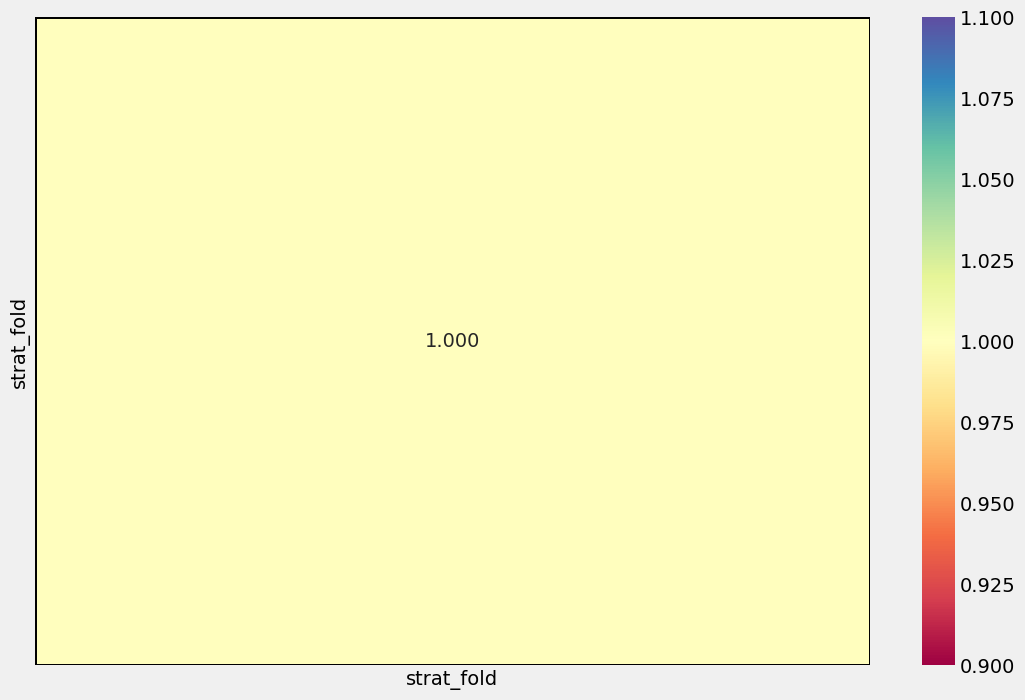

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



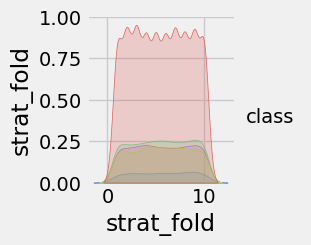

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):

----------------------------------------------------------------------------------------------------
Countplot(s):



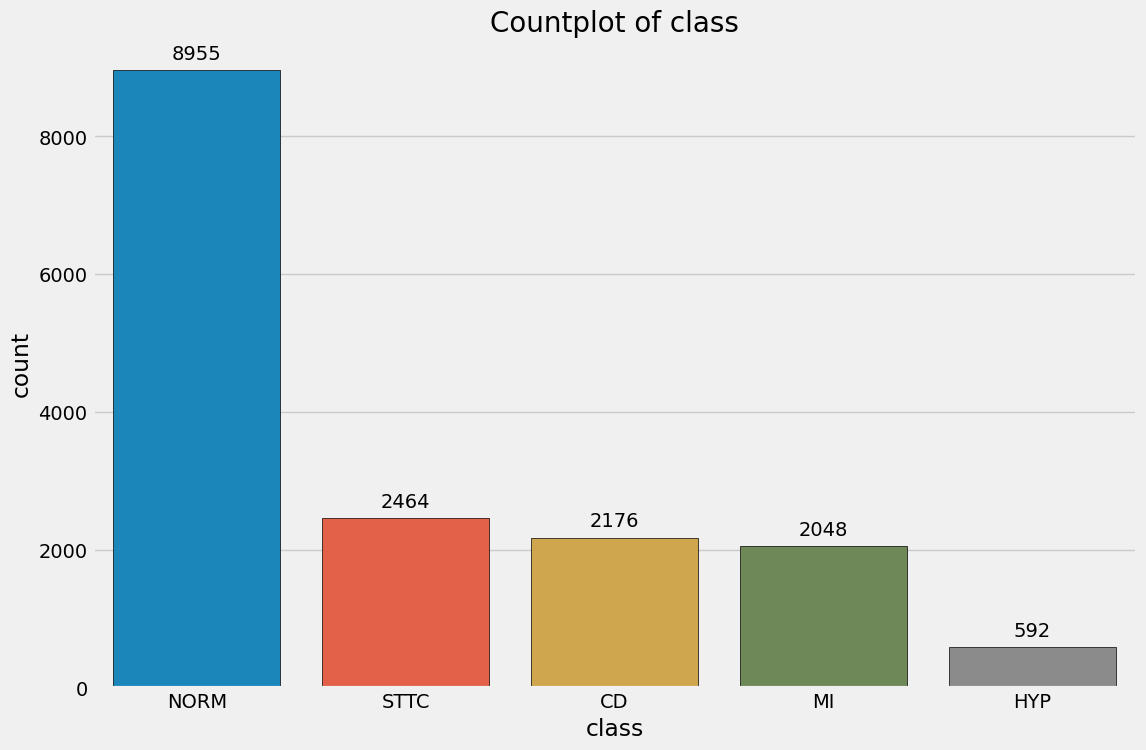

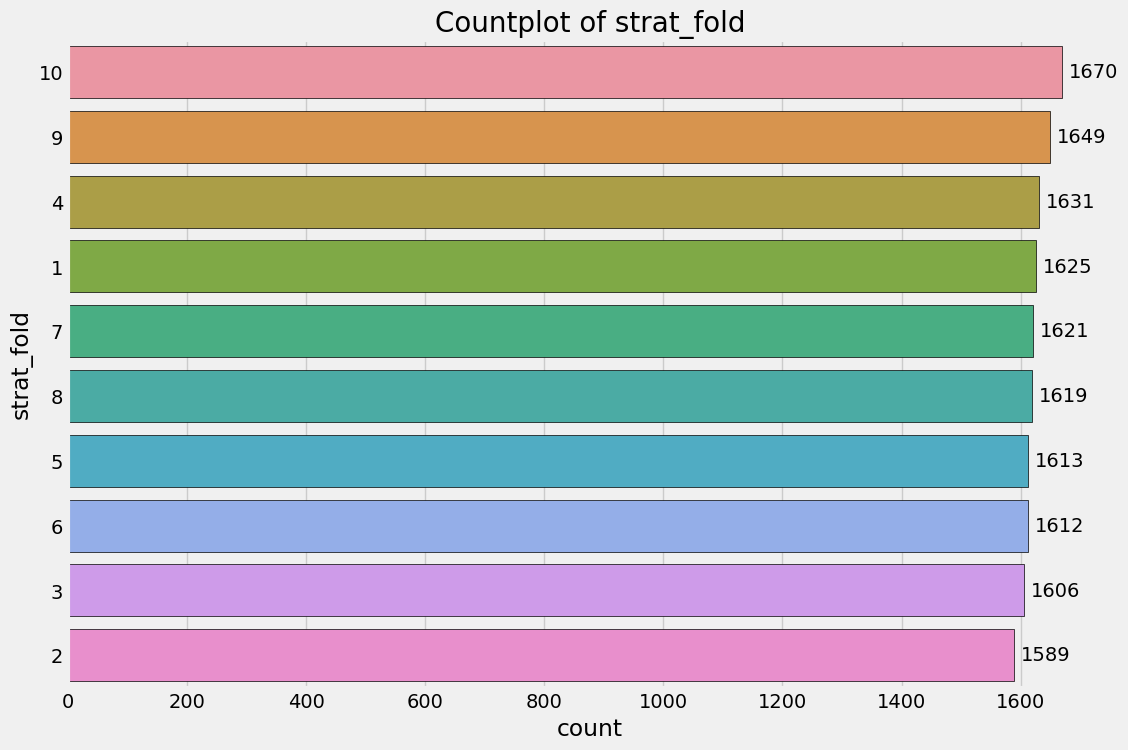

In [32]:
#use this package for the EDA
fast_eda(ecg_dataset, target = "class")

In [33]:
print(f"Total number of ECG (X) Records : {ecg_data.shape}")
print(f"Total number of Diagnostic Class(Y) Records : {len(ecg_dataset)}")

Total number of ECG (X) Records : (16235, 1000, 12)
Total number of Diagnostic Class(Y) Records : 16235


# **Preprocessing of ECG Data**

In [34]:
import scipy.signal as signal
from scipy.signal import butter, filtfilt

In [35]:
# Denoising Methods

def remove_baseline_wander(ecg_signal, sampling_rate):
    # Determine the cutoff frequency for high-pass filter
    cutoff_freq = 0.05  # Adjust this value based on your signal characteristics

    # Design and apply a high-pass filter to remove baseline wander
    b, a = signal.butter(1, cutoff_freq / (sampling_rate / 2), 'highpass')
    ecg_signal_filtered = signal.filtfilt(b, a, ecg_signal)
    
    return ecg_signal_filtered

In [36]:
def apply_notch_filter(ecg_signal, notch_freq, sampling_rate):
    # Design and apply a notch filter to remove powerline interference
    q_factor = 30  # Adjust this value based on your signal characteristics
    notch_freq_normalized = notch_freq / (sampling_rate / 2)
    b, a = signal.iirnotch(notch_freq_normalized, q_factor)
    ecg_signal_filtered = signal.filtfilt(b, a, ecg_signal)

    return ecg_signal_filtered

In [37]:
# Apply bandpass filter to remove noise
def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

In [38]:
def apply_normalization(ecg_signal):
    # Apply normalization to scale the signal between 0 and 1
    ecg_signal_normalized = (ecg_signal - np.min(ecg_signal)) / (np.max(ecg_signal) - np.min(ecg_signal))
    
    return ecg_signal_normalized

In [39]:
# Define the preprocess_ecg_data function
def preprocess_ecg_data(ecg_signal, sampling_rate):
    # # Remove baseline wander
    ecg_signal = remove_baseline_wander(ecg_signal, sampling_rate)
    
    # Apply notch filter
    notch_freq = 50 
    ecg_signal = apply_notch_filter(ecg_signal,notch_freq, sampling_rate)
    #ecg_signal = np.apply_along_axis(lambda x: apply_notch_filter(x, notch_freq=notch_freq, sampling_rate=sampling_rate), axis=0, arr=ecg_signal)
    
    # Apply bandpass filter
    lowcut = 0.5  
    highcut = 40  
    ecg_signal = np.apply_along_axis(lambda x: apply_bandpass_filter(x, lowcut=lowcut, highcut=highcut, fs=sampling_rate), axis=0, arr=ecg_signal)
    
    # Apply normalization
    ecg_signal = apply_normalization(ecg_signal)
    
    return ecg_signal

In [40]:
sampling_rate = 100
#apply preprocessing to the ECG data.
X_cleaned = preprocess_ecg_data(list(ecg_data), sampling_rate)

In [41]:
print(f"Total number of ECG (X_Cleaned) Records : {X_cleaned.shape}")
print(f"Total number of Diagnostic Class(Y) Records : {len(ecg_dataset)}")

Total number of ECG (X_Cleaned) Records : (16235, 1000, 12)
Total number of Diagnostic Class(Y) Records : 16235


In [58]:
X_temp = X_cleaned[:10,:, ]
Y_temp = ecg_dataset["class"][:10]

In [54]:
import tensorflow as tf
import tensorflow.keras

In [70]:
dataset_X = tf.data.Dataset.from_tensor_slices(X_temp)
dataset_Y = tf.data.Dataset.from_tensor_slices(Y_temp)
dataset =  tf.data.Dataset.zip((dataset_X, dataset_Y))

batched_dataset = dataset.batch(4, drop_remainder=True)

for batch in batched_dataset.take(4):
    print([f"Shape of Batched Dataset {arr.numpy().shape}" for arr in batch])

['Shape of Batched Dataset (4, 1000, 12)', 'Shape of Batched Dataset (4,)']
['Shape of Batched Dataset (4, 1000, 12)', 'Shape of Batched Dataset (4,)']
